## Общая информация

**Срок сдачи:** 5 апреля 2022, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from scipy.spatial import distance
from sklearn.neighbors import KDTree
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import KFold, cross_val_score

### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        res = np.zeros(X.shape[0])
        if self.algorithm=='brute':
            dist = distance.cdist(X, self.X_train, self.metric)
            for i in range(0,len(X)):
                arg_min = dist[i].argsort()[:self.n_neighbors]
                res[i] = np.argmax(np.bincount(self.y_train[arg_min])) 
        elif self.algorithm=='kd_tree':
            kdtree = KDTree(self.X_train, metric = self.metric)
            dist, ind = kdtree.query(X, self.n_neighbors)
            for i in range(0,len(X)):
                res[i] = np.argmax(np.bincount(self.y_train[ind[i]])) 
        return res
            

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 2 (0.5 балла)

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 234 µs, sys: 45 µs, total: 279 µs
Wall time: 258 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 789 µs, sys: 633 µs, total: 1.42 ms
Wall time: 937 µs


array([2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 0])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 394 µs, sys: 434 µs, total: 828 µs
Wall time: 573 µs


array([2., 2., 1., 1., 0., 0., 2., 2., 0., 1., 0., 1., 1., 2., 0.])

### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 289 µs, sys: 216 µs, total: 505 µs
Wall time: 676 µs


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.62 µs


In [16]:
%time clf.predict(X_test)

CPU times: user 1.07 ms, sys: 967 µs, total: 2.04 ms
Wall time: 1.55 ms


array([1, 2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 399 µs, sys: 437 µs, total: 836 µs
Wall time: 584 µs


array([1., 2., 1., 1., 2., 0., 2., 0., 0., 0., 2., 2., 1., 0., 1.])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 4 (2.5 балла)

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
vector = CountVectorizer(max_df = 0.06, min_df = 0.01)
X = vector.fit_transform(data)
X = X.toarray()

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
kf = KFold(n_splits = 3)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [23]:
def opt_neigh_2(X, y, algorithm = 'brute', metric = 'euclidean'):
    accur_mean = np.zeros(10)
    for k in range(1,11):
        mykn = MyKNeighborsClassifier(n_neighbors = k, algorithm = algorithm, metric = metric)
        accur_mean[k-1] = cross_val_score(mykn, X, y, cv = 3, scoring = 'accuracy').mean()
    accur_res = accur_mean
    optim = np.argmax(accur_res) + 1
    return accur_mean, optim

In [24]:
accur_mean, optim = opt_neigh_2(X, target)

In [25]:
k = [1,2,3,4,5,6,7,8,9,10]

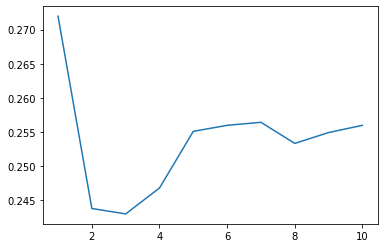

In [26]:
plt.plot(k,accur_mean)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [27]:
accur_cos, opt_cos = opt_neigh_2(X, target, algorithm = 'brute', metric = 'cosine')

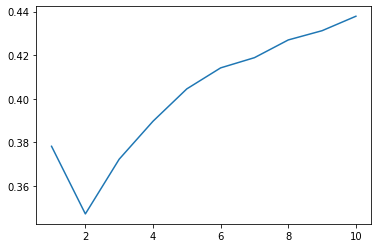

In [28]:
plt.plot(k, accur_cos)

In [91]:
tvector = TfidfVectorizer(max_df = 0.06, min_df = 0.01)
tX = tvector.fit_transform(data)
tX = tX.toarray()

In [97]:
taccur_euc, topt_euc = opt_neigh_2(tX, target)

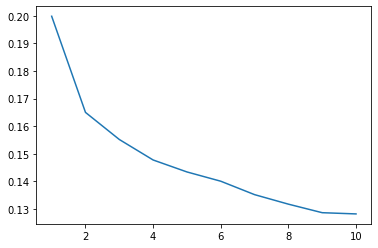

In [98]:
plt.plot(k,taccur_euc)

In [36]:
taccur_cos, topt_cos = opt_neigh_2(tX, target, algorithm = 'brute', metric = 'cosine')

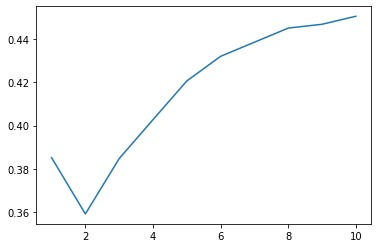

In [37]:
plt.plot(k,taccur_cos)

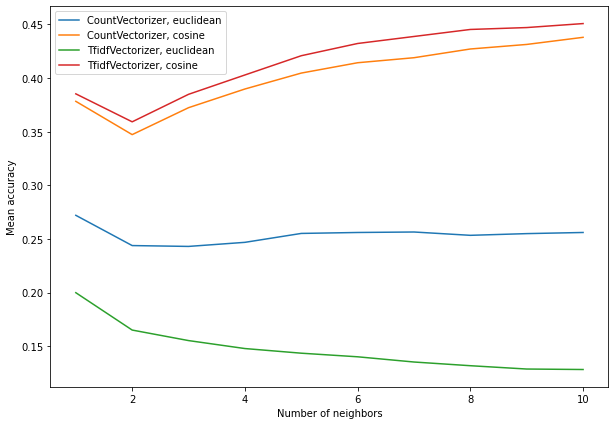

In [99]:
plt.figure(figsize=(10,7))
plt.ylabel('Mean accuracy')
plt.xlabel("Number of neighbors") 
plt.plot(k, accur_mean, label = 'CountVectorizer, euclidean')
plt.plot(k, accur_cos, label='CountVectorizer, cosine')
plt.plot(k,taccur_euc, label='TfidfVectorizer, euclidean')
plt.plot(k,taccur_cos, label='TfidfVectorizer, cosine')
plt.legend()
plt.show()

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [93]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [94]:
test_data = newsgroups['data']
test_target = newsgroups['target']

In [95]:
test_X = tvector.transform(test_data)
test_X = test_X.toarray()

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [96]:
mykn = MyKNeighborsClassifier(n_neighbors=10, algorithm='brute', metric='cosine')
mykn.fit(tX, target)
pred_y = mykn.predict(test_X)
accuracy_score(pred_y, test_target)

0.40400955921402015

Качество на тестовой выборке, конечно, ниже, чем на кросс-валидации, но несильно уступает. 
Возможно, произошло небольшое переобучение. Ну и конечно, тестовая выборка не такая, как валидационная
выборка, из-за этого качество тоже отличается.